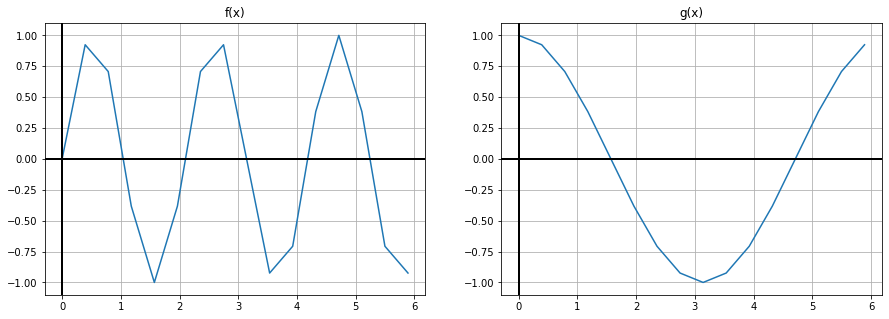

In [235]:
import scipy as sp
import pylab as pl
import numpy as np

def f(x):
    return sp.sin(3*x)

def g(x):
    return sp.cos(x)

N = 16
period = cm.pi * 2

x_array = sp.arange(0, period, (period / N))
f_y = sp.vectorize(f)(x_array)
g_y = sp.vectorize(g)(x_array)

pl.figure(figsize = (15 , 5))

pl.subplot(1, 2, 1)
pl.plot(x_array, f_y)
pl.title("f(x)")
pl.axhline(linewidth=2, color="black")
pl.axvline(linewidth=2, color="black")
pl.grid()

pl.subplot(1, 2, 2)
pl.plot(x_array, g_y)
pl.title("g(x)")
pl.grid()
pl.axhline(linewidth=2, color="black")
pl.axvline(linewidth=2, color="black")
pl.show()

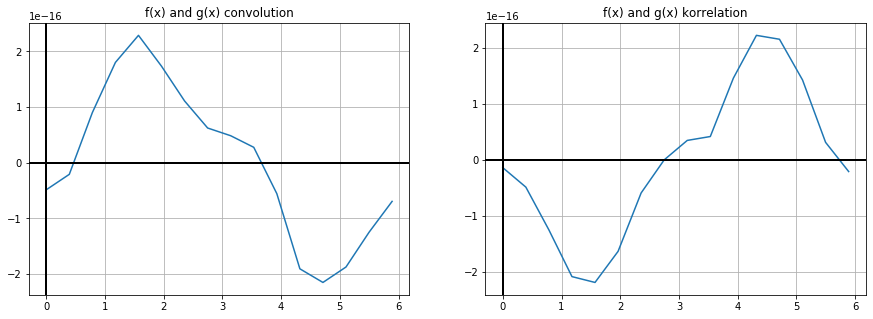

In [236]:
def korrelation(f, g, N, period):
    kor = []
    float_n = float(N)
    for m in range(N):        
        kor.append(0)
        for h in range(N):
            kor[m] += f(period * (h/float_n)) * (g(period * (((m+h)%N) / float_n)))
    return [x/N for x in kor]

def convolution(f, g, N, period):
    kor = []
    float_n = float(N)
    for i in range(N):        
        kor.append(0)
        for j in range(N):
            g_x = i-j
            if (g_x < 0):
                g_x += N
            kor[i] += f(period * (j/float_n)) * (g(period * (g_x / float_n)))
    return [x/N for x in kor] 


classic_korrelation = korrelation(f, g, N, period)
classic_convolution = convolution(f, g, N, period)

pl.figure(figsize = (15 , 5))


pl.subplot(1, 2, 1)
pl.plot(x_array, classic_convolution)
pl.title("f(x) and g(x) convolution")
pl.axhline(linewidth=2, color="black")
pl.axvline(linewidth=2, color="black")
pl.grid()

pl.subplot(1, 2, 2)
pl.plot(x_array, classic_korrelation)
pl.title("f(x) and g(x) korrelation")
pl.axhline(linewidth=2, color="black")
pl.axvline(linewidth=2, color="black")
pl.grid()

pl.show()

In [237]:
fft_f = np.fft.fft(f_y)
fft_g = np.fft.fft(g_y)

In [238]:
f_transformed_conjugate = list(map(lambda x: x.conjugate(), fft_f))
fg_korrelation_transformed = sp.multiply(f_transformed_conjugate, fft_g)

fg_convolution_transformed = sp.multiply(fft_f, fft_g)

In [239]:
fg_korrelation = np.fft.ifft(fg_korrelation_transformed)
fg_convolution = np.fft.ifft(fg_convolution_transformed)

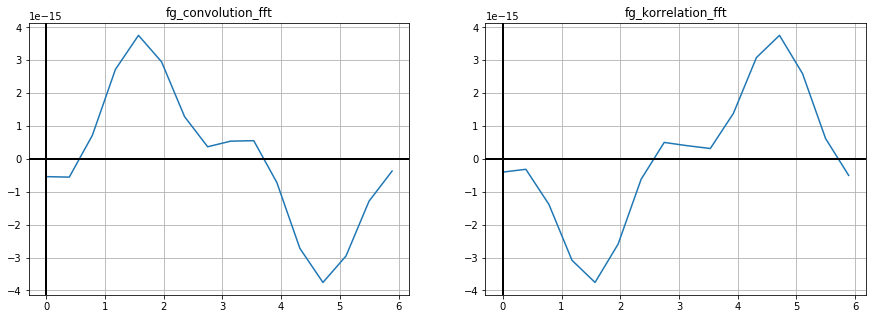

In [240]:
pl.figure(figsize = (15 , 5))

pl.subplot(1, 2, 1)
pl.plot(x_array, fg_convolution)
pl.title("fg_convolution_fft")
pl.axhline(linewidth=2, color="black")
pl.axvline(linewidth=2, color="black")
pl.grid()

pl.subplot(1, 2, 2)
pl.plot(x_array, fg_korrelation)
pl.title("fg_korrelation_fft")
pl.axhline(linewidth=2, color="black")
pl.axvline(linewidth=2, color="black")
pl.grid()

